<a href="https://colab.research.google.com/github/dushyantmaharshi/Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Basic Data Exploration**

In [3]:
# Importing the csv
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/SeoulBikeData.csv',encoding= 'unicode_escape')

In [5]:
df.shape

(8760, 14)

In [7]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df.describe(include = 'all', percentiles = [.25,.50,.75,.80,.85,.90,.95])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# duplicate
len(df[df.duplicated()])

0

# **Overview Of Data**
* There are 8760 rows and 14 features in our dataset
* No null values are there
* There are 4 categorical features and 10 numerical features
* Dependent Variable - 'Rented Bike Count'

# **Exploratory Data Analysis**

# *Feature Engineering*

Exploring the date column 

In [12]:
import datetime

In [13]:
# Date columns to Date format conversion
df['Date']= pd.to_datetime(df['Date'])

In [14]:
# Let's check how many years data is taken
years_in_data = pd.to_datetime(df['Date']).dt.year.unique()
months_in_data = pd.to_datetime(df['Date']).dt.month.nunique()
print(f'{months_in_data} months data for year {years_in_data}  is captured in the given dataset.')

12 months data for year [2017 2018]  is captured in the given dataset.


Date variable contains information of - day,month and year for a given data. 

 'Month' and 'Day' information we can use to look for a trend of bike booking. Let us implement this.

In [15]:
# Extracting day,month, day of week and weekdays/weekend from date column
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date'],axis=1)

Converted the date feature in month, day and weekends to see the trends 

In [16]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_week,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


## **Outlier Detection**

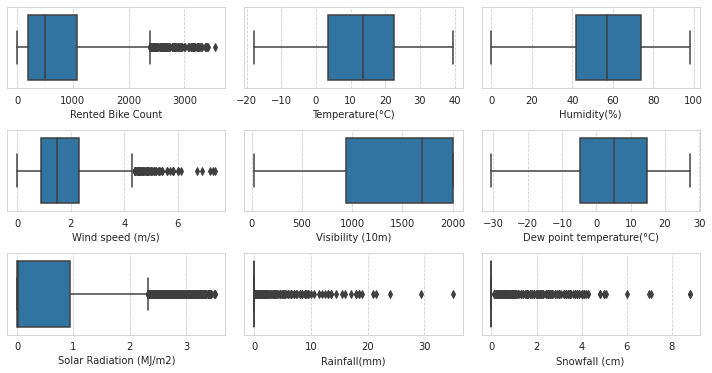

In [19]:
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(['Rented Bike Count','Temperature(°C)','Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

There are 5 variables where outliers are present - Rented Bike Count, Rainfall, Snowfall,Solar Radiation and windspeed. One should note that all four out of five variables are seasonal event. Let us check whether their max and minimum values seems superficial.

In [20]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


It is evident from boxplot and above description that, since the outliers are in only seasonal events and their max and min numbers are not superficial, we can consider these outliers as allowable.

## *Hourly Basis Bike Sharing Demand*

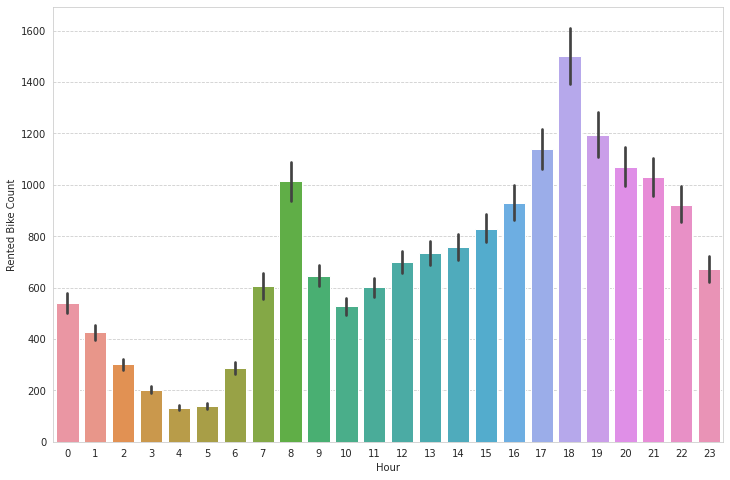

In [21]:
# Displaying Hourly basis Bike Demand
plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = df)

[Text(0.5, 1.0, 'Rented Bike Count During different Seasons')]

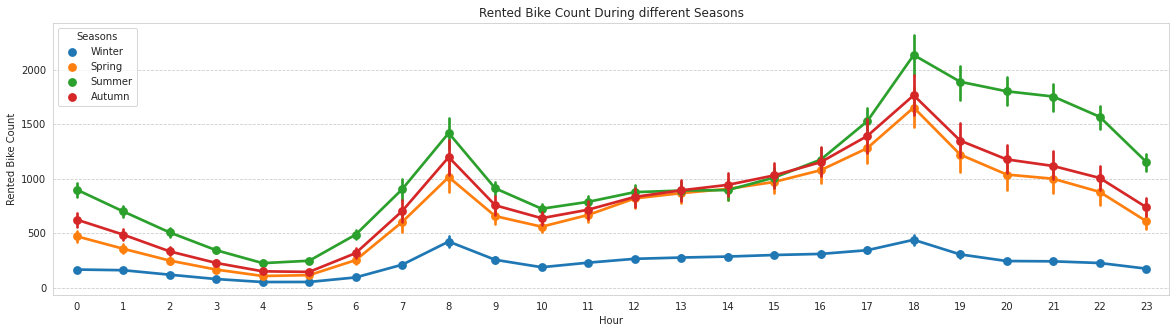

In [22]:
# Displaying Hourly basis Bike Demand in different seasons
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Rented Bike Count During different Seasons')

Seasonal Demand Trends -

* Peak demand is usually at 6 PM and the demand increases between 5 PM to 7 PM.
* Minimum demand is observed between 3 AM to 4 AM.
* We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand


## *Monthly Bike Sharing Demand*

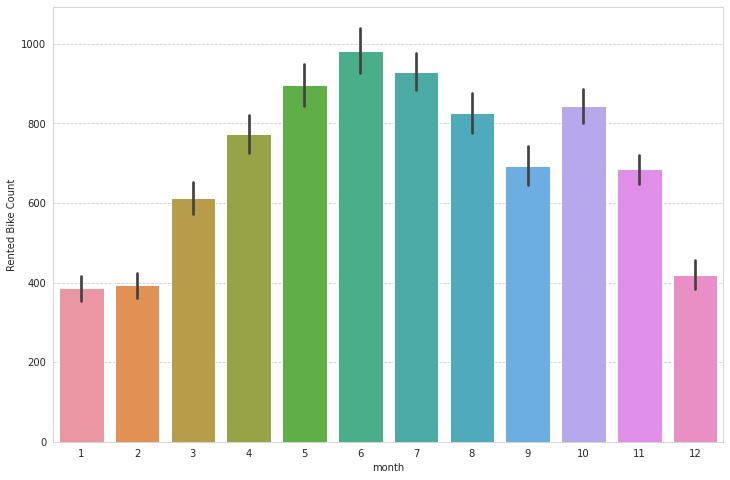

In [23]:
#Create the plot
plt.figure(figsize = (12,8))
sns.barplot(x='month', y='Rented Bike Count', data = df)

## *Seasonal Rented Bike Count*

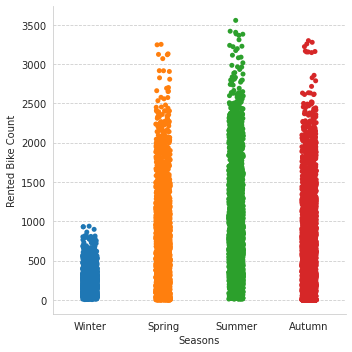

In [30]:
#Create the plot
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

# *Affect of Weekday and Weekend*

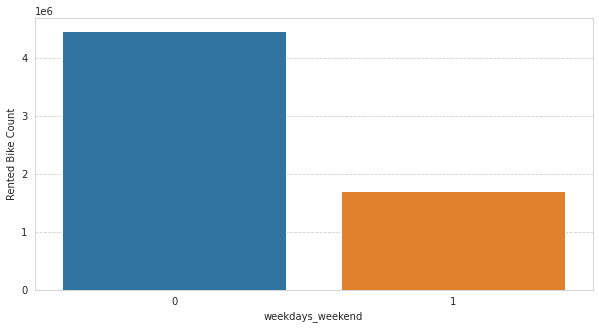

In [28]:
# Creating the PLot
weekend_affect = df.groupby('weekdays_weekend', as_index = False)['Rented Bike Count'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x= 'weekdays_weekend' , y='Rented Bike Count', data= weekend_affect)

## *Effect of Temperature On Rented Bike Count*

Text(0.5, 1.0, 'Rented bike count with respect to TEMPERATURE')

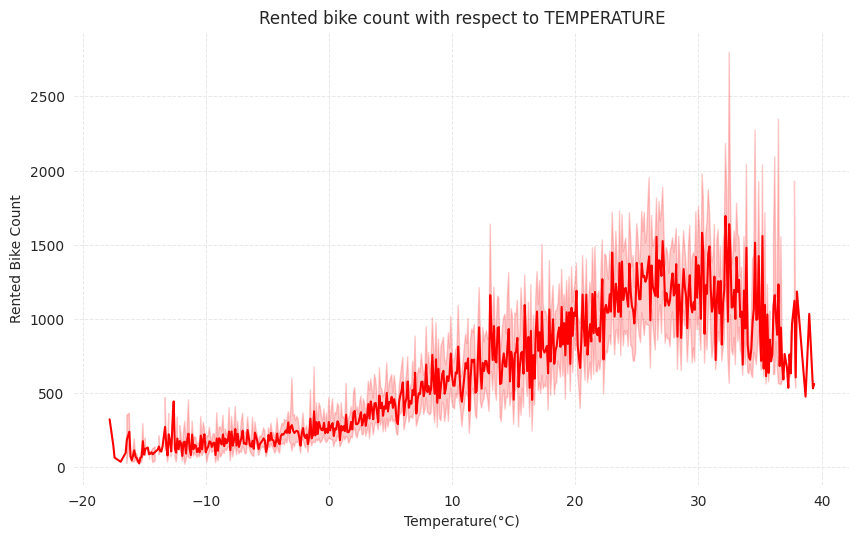

In [33]:
# Let's plot a line plot to display the temperature 
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Temperature(°C)", y="Rented Bike Count", 
             color='red')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title('Rented bike count with respect to TEMPERATURE')